# A/B Testing Email CTA Optimization Portfolio Project

Analyzing conversion performance between two email variants to determine which call-to-action (CTA) leads to better results.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [8]:
# Set seed for reproducibility
np.random.seed(42)

# Simulate user data
n_a = 1000
n_b = 980
conversions_a = np.random.binomial(1, 0.085, n_a)
conversions_b = np.random.binomial(1, 0.122, n_b)

df_a = pd.DataFrame({
    "variant": "A",
    "user_id": range(1, n_a + 1),
    "converted": conversions_a
})

df_b = pd.DataFrame({
    "variant": "B",
    "user_id": range(n_a + 1, n_a + n_b + 1),
    "converted": conversions_b
})

ab_test_data = pd.concat([df_a, df_b], ignore_index=True)
ab_test_data.head()

,variant,user_id,converted
0,A,1,0
1,A,2,1
2,A,3,0
3,A,4,0
4,A,5,0


In [9]:
# Group by variant and calculate conversion stats
summary = ab_test_data.groupby("variant")["converted"].agg(["count", "sum"])
summary["conversion_rate"] = summary["sum"] / summary["count"]
summary

,count,sum,conversion_rate
variant,,,
A,1000,81,0.081000
B,980,114,0.116327


In [10]:
# Extract values
n_a = summary.loc["A", "count"]
n_b = summary.loc["B", "count"]
x_a = summary.loc["A", "sum"]
x_b = summary.loc["B", "sum"]

p_a = x_a / n_a
p_b = x_b / n_b
p_pool = (x_a + x_b) / (n_a + n_b)

z_score = (p_b - p_a) / np.sqrt(p_pool * (1 - p_pool) * (1/n_a + 1/n_b))
p_value = 1 - norm.cdf(z_score)

{
    "Conversion Rate A": round(p_a * 100, 2),
    "Conversion Rate B": round(p_b * 100, 2),
    "Lift (%)": round((p_b - p_a) / p_a * 100, 2),
    "Z-Score": round(z_score, 3),
    "P-Value": round(p_value, 4),
    "Statistically Significant (p < 0.05)": p_value < 0.05
}

{'Conversion Rate A': np.float64(8.1),
 'Conversion Rate B': np.float64(11.63),
 'Lift (%)': np.float64(43.61),
 'Z-Score': np.float64(2.638),
 'P-Value': np.float64(0.0042),
 'Statistically Significant (p < 0.05)': np.True_}

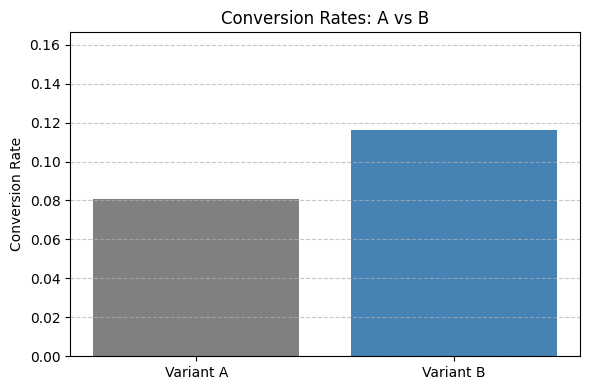

In [11]:
# Visualization
plt.figure(figsize=(6,4))
plt.bar(['Variant A', 'Variant B'], [p_a, p_b], color=['gray', 'steelblue'])
plt.title("Conversion Rates: A vs B")
plt.ylabel("Conversion Rate")
plt.ylim(0, max(p_a, p_b) + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()